In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_excel('/Users/apple/Downloads/iris.xls')
df.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display statistics
df.describe()


,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Info about datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Data Preprocessing

In [7]:
# Look for null values
df.isnull().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Exploratory Data Analysis

<Axes: >

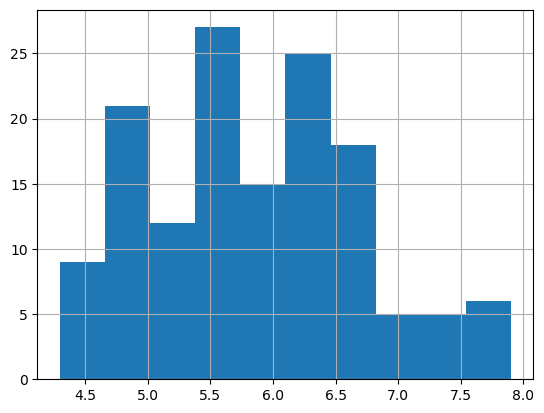

In [8]:
df['SL'].hist()
# histograms

<Axes: >

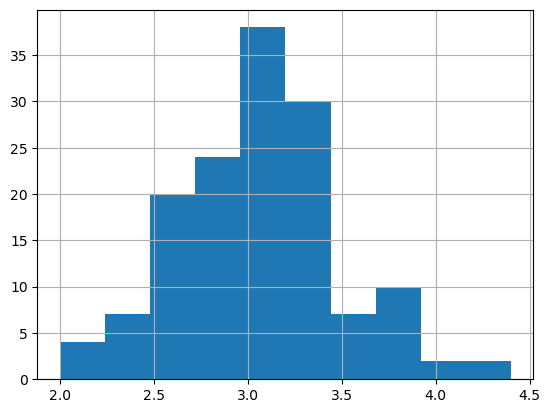

In [9]:
df['SW'].hist()


<Axes: >

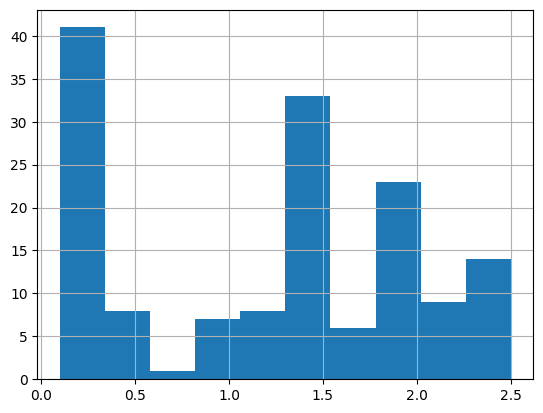

In [9]:
df['PW'].hist()


In [10]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

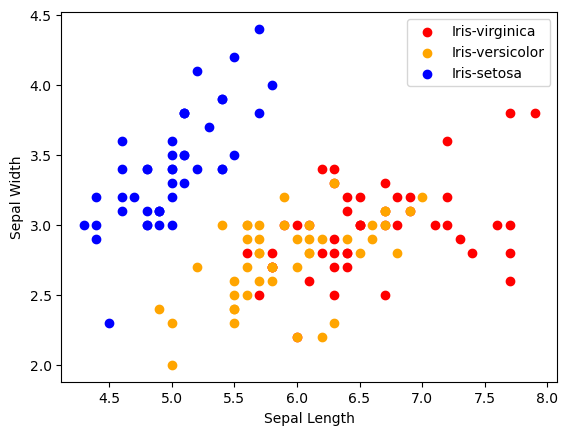

In [11]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


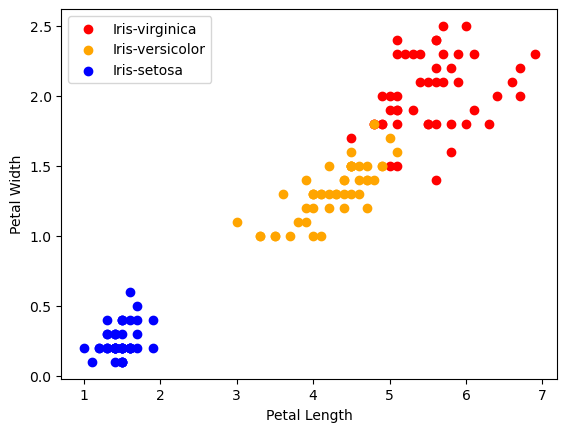

In [12]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


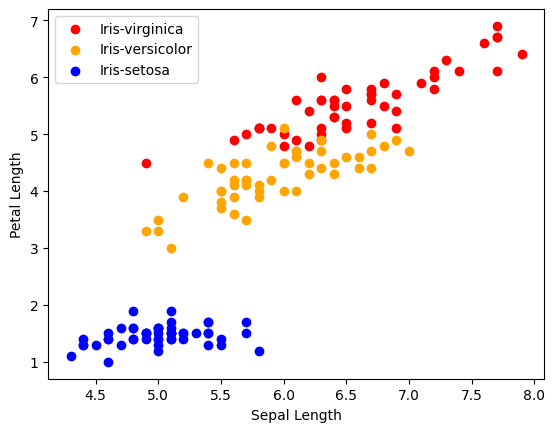

In [13]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()


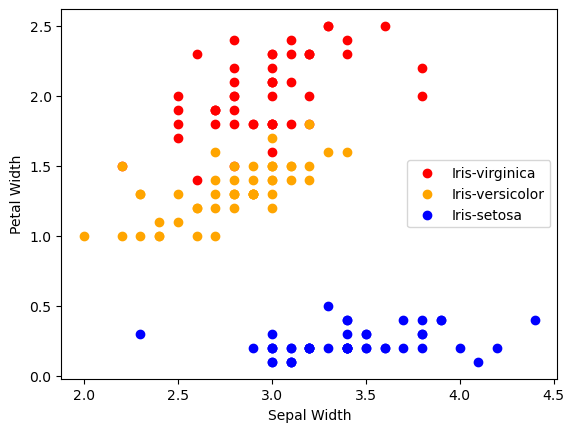

In [13]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


### Coorelation Matrix
  

In [16]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


<Axes: >

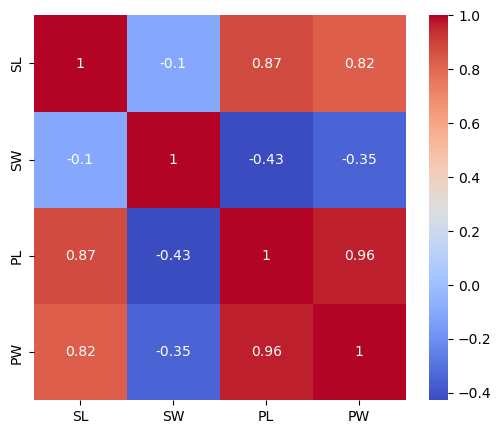

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoding


In [17]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [18]:
#df['Classification'] = le.fit_transform(df['Classification'])
#df.head()


# Model Training

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Classification'])
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [23]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [24]:
# model training
model.fit(x_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [23]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [24]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  97.77777777777777


In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [27]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  95.55555555555556


In [29]:
x_test.head()

,SL,SW,PL,PW
118,7.7,2.6,6.9,2.3
73,6.1,2.8,4.7,1.2
92,5.8,2.6,4.0,1.2
0,5.1,3.5,1.4,0.2
119,6.0,2.2,5.0,1.5


In [30]:
#save the model
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [31]:
load_model = pickle.load(open(filename, 'rb'))

In [32]:
load_model.predict([[5.7,3.8,1.7,.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)